<a href="https://colab.research.google.com/github/blancavazquez/diplomado_IA/blob/main/notebooks/Tema_03/01_Motivacion_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 11: Introducción a las redes neuronales
## Tema 3: Redes convolucionales


El objetivo de esta libreta es crear un perceptrón multicapa para clasificar imágenes de MNIST. Esta libreta nos servirá de motivación para identificar las áreas de oportunidad en el uso de redes convolucionales.

Algunos datos de MNIST:
* MNIST contiene 60.000 imágenes de entrenamiento y 10.000 imágenes de prueba de dígitos manuscritos.
* Las imágenes se encuentran en escala de grises.
* Cada imagen tiene un tamaño de 28x28 píxeles.


In [ ]:
# Carga de bibliotecas
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.utils import to_categorical

## Paso 1: Carga de datos

In [ ]:
#Descarga de la base de datos de imágenes
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(f'Número de imágenes de entrenamiento: {len(X_train)}')
print(f'Número de imágenes de prueba: {len(X_test)}')

Número de imágenes de entrenamiento: 60000
Número de imágenes de prueba: 10000


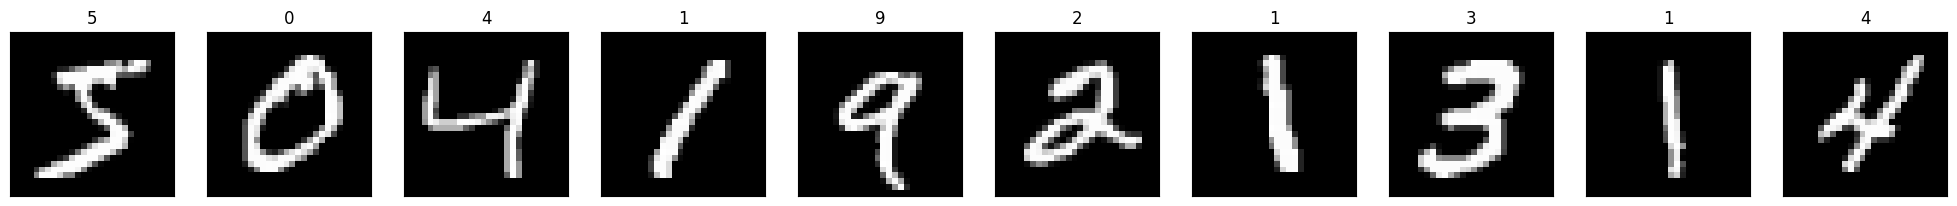

In [ ]:
#Visualizando algunas imágenes
muestras = 10
figure = plt.figure(figsize=(25, 25))
for indice in range(muestras):
    ax = figure.add_subplot(1, muestras, indice + 1, xticks=[], yticks=[])
    ax.imshow(X_train[indice], cmap='gray')
    ax.set_title(y_train[indice])


* ¿Qué número observas?
* ¿Son iguales todas las imágenes del mismo número?

## Hagamos un zoom a una imagen, ¿qué observas?


Esta imagen es una representación de lo que realmente "observa" una computadora.

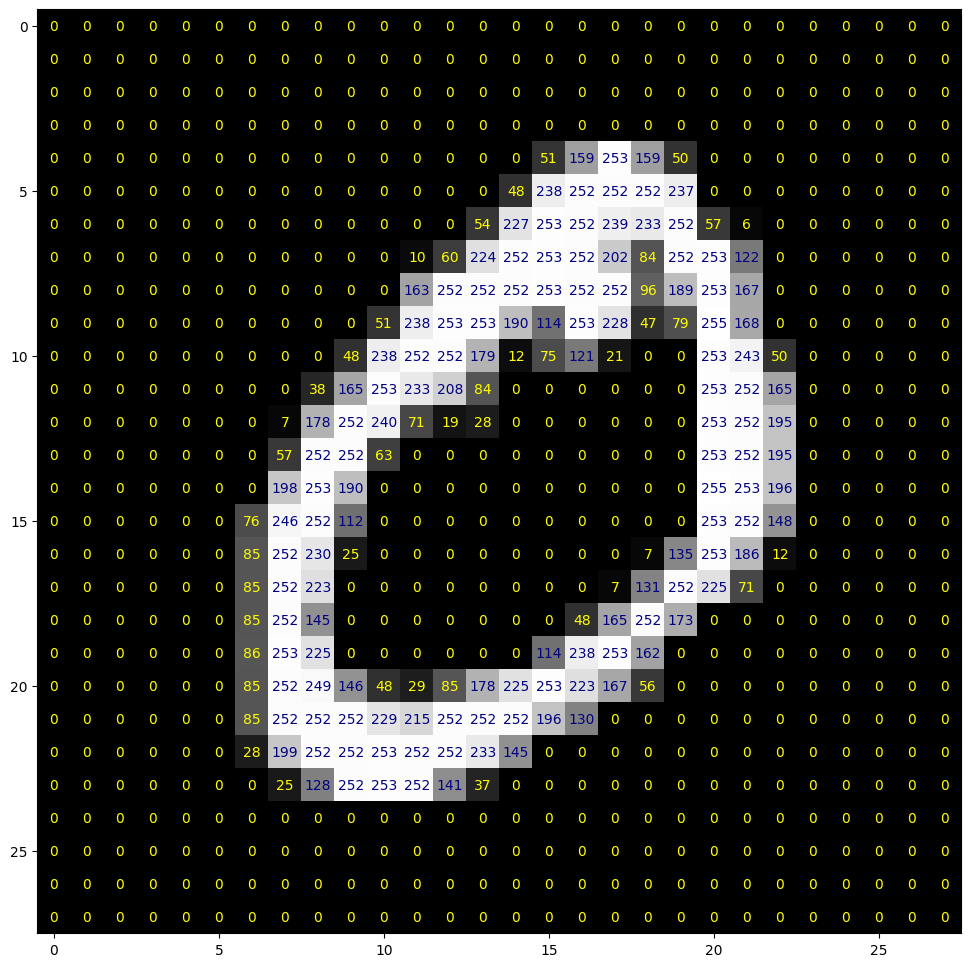

In [ ]:
def visualize_input(image, ax):
    ax.imshow(image, cmap='gray')
    width, height = image.shape
    threshold = image.max() / 2.5

    for x in range(width):
        for y in range(height):
            pixel_value = image[x][y]
            ax.annotate(f'{round(pixel_value, 2)}',
                        xy=(y, x),
                       horizontalalignment='center',
                       verticalalignment='center',
                       color='yellow' if pixel_value < threshold else 'navy')

indice_muestra = 1
figure = plt.figure(figsize=(12, 12))
ax = figure.add_subplot(111)
visualize_input(X_train[indice_muestra], ax)

## Paso 2: Pre-procesamiento de las imágenes

In [ ]:
#Rescalar la imagen
#El valor de cada pixel se divide entre 255. Esto hará que cada pixel esté en un rango de 0 a 1.
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [ ]:
#Codificar las etiquetas a vectores Ohe-Hot
#Las etiquetas reales tiene un valor de 1,2,...,9.
#Cada etiqueta se convertirá a un vector de solo ceros, a excepción del índice que representa al número, donde habrá un 1.

print('Observando algunas etiquetas originales \n:', y_train[:10])
total_etiquetas = 10
y_train = to_categorical(y_train, total_etiquetas) #conversión a Ohe-Hot
y_test = to_categorical(y_test, total_etiquetas)

print('Observando algunas etiquetas One-Hot:\n', y_train[:10])

Observando algunas etiquetas originales 
: [5 0 4 1 9 2 1 3 1 4]
Observando algunas etiquetas One-Hot:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Paso 3: Diseño de la arquitectura del modelo y entrenamiento

In [ ]:
#Se define una arquitectura sencilla de 3 capas.
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:])) # Se aplana cada imagen (28×28=784 elementos)
model.add(Dense(512, activation='relu')) #1era capa
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) #2da capa
model.add(Dropout(0.2))
model.add(Dense(total_etiquetas, activation='softmax')) #Capa de salida

# Model summarization
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 512)               262656    
                                                                 
 dropout_5 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 66970

¿Qué observas?
* Total de parámetros a entrenar: 669,706 (y eso que son solo 3 capas)
* ¿Recuerdas el tamaño original (resolución) de cada imagen?

-----------
* 1er problema: en las redes perceptrón multicapa y su uso en imágenes: **Escalabilidad**
* 2do problema: la información **espacial** de los números representados en cada imagen se pierde.

En el perceptrón: cada imagen es transformada en un gran vector (784 elementss) sin ninguna relación en particular.



In [ ]:
#Compilando el modelo
model.compile(loss='categorical_crossentropy',
              optimizer='adam', #optimizador
              metrics=['accuracy'])

### Entrenamiento

In [ ]:
#Guardar el mejor modelo
if not os.path.exists('modelos'):
    os.mkdir('modelos')

OUTPUT_PATH = 'modelos/mlp.mnist.best.hdf5'
checkpointer = ModelCheckpoint(filepath=OUTPUT_PATH, save_best_only=True)

EPOCHS = 10
BATCH_SIZE = 256
model_history = model.fit(X_train,
                          y_train,
                          batch_size=BATCH_SIZE,
                          validation_split=0.2, #creación del conjunto de validación
                          epochs=EPOCHS,
                          callbacks=[checkpointer],
                          shuffle=True)

Epoch 1/10
188/188 [==============================] - 8s 38ms/step - loss: 0.3387 - accuracy: 0.8997 - val_loss: 0.1367 - val_accuracy: 0.9587
Epoch 2/10
  4/188 [..............................] - ETA: 4s - loss: 0.1340 - accuracy: 0.9609

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


188/188 [==============================] - 5s 27ms/step - loss: 0.1272 - accuracy: 0.9613 - val_loss: 0.1064 - val_accuracy: 0.9669
Epoch 3/10
188/188 [==============================] - 9s 47ms/step - loss: 0.0865 - accuracy: 0.9738 - val_loss: 0.0845 - val_accuracy: 0.9755
Epoch 4/10
188/188 [==============================] - 6s 33ms/step - loss: 0.0628 - accuracy: 0.9804 - val_loss: 0.0826 - val_accuracy: 0.9762
Epoch 5/10
188/188 [==============================] - 9s 48ms/step - loss: 0.0507 - accuracy: 0.9831 - val_loss: 0.0802 - val_accuracy: 0.9772
Epoch 6/10
188/188 [==============================] - 7s 35ms/step - loss: 0.0428 - accuracy: 0.9862 - val_loss: 0.0811 - val_accuracy: 0.9772
Epoch 7/10
188/188 [==============================] - 8s 40ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0880 - val_accuracy: 0.9759
Epoch 8/10
188/188 [==============================] - 6s 34ms/step - loss: 0.0288 - accuracy: 0.9906 - val_loss: 0.0840 - val_accuracy: 0.9775
Epoch 9/10

## Evaluando el rendimiento del modelo

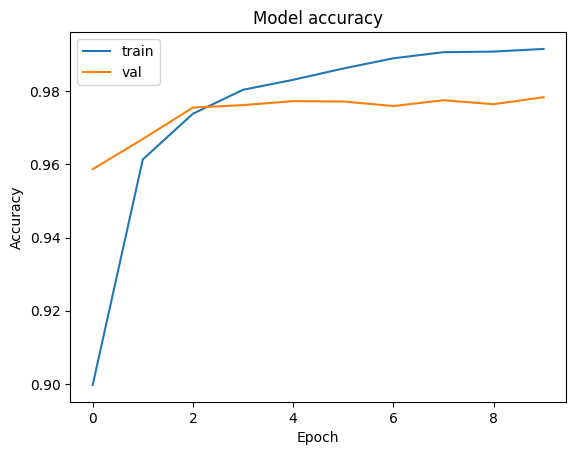

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

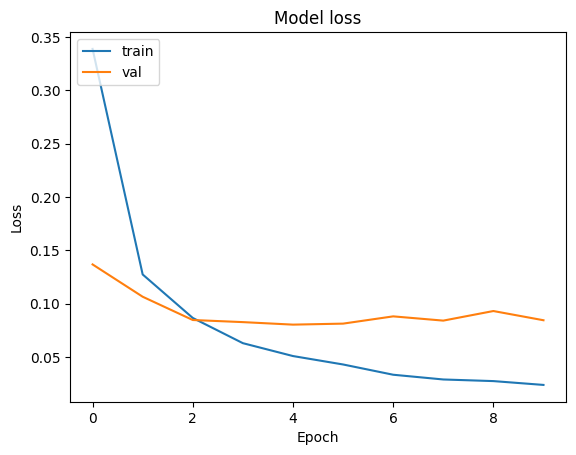

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Cargando el mejor modelo
model.load_weights(OUTPUT_PATH)
#Evaluando en el conjunto de prueba
score = model.evaluate(X_test, y_test)
print(f'Test accuracy: {100 * score[1]}')

313/313 [==============================] - 3s 8ms/step - loss: 0.0677 - accuracy: 0.9786
Test accuracy: 97.8600025177002


## Análizando los resultados:

Si las redes de perceptrón, no son ideales para el procesamiento de imágenes, entonces, ¿porque obtuvo un alto rendimiento?


* El número de clases es pequeño (10)
* La resolución de las imágenes es baja (28x28)
* Los números se encuentran en el centro de cada imagen.
* Las imágenes se encuentran en blanco y negro.
* Todos los números en cada imagen son apróximadamente del mismo tamaño.
